In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500


In [2]:
# Datos sintéticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1, 52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15*MedInc + 0.03*HouseAge + np.random.randn(n)

# target
target = (
    0.45*MedInc
    - 0.02*HouseAge
    - 0.3*(Latitude-36)
    - 0.1*(Longitude+119)
    + 0.2*AveRooms
    + np.random.randn(n)*0.5
)

df = pd.DataFrame(
    {

    'MedInc': MedInc,
    'HouseAge': HouseAge,
    'Longitude': Longitude,
    'Latitude': Latitude,
    'AveRooms': AveRooms,
    'target': target,
}
    )

numeric_cols = df.columns.tolist()

In [3]:
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()

print("Covariance Matrix:\n", cov_mat.round(3), "\n")
print("Correlation Matrix\n", corr_mat.round(3))


Covariance Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.829
HouseAge   -3.196   222.304     -2.162    -0.080     5.950  -3.986
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.892
Latitude    0.694    -0.080      0.390     5.031    -0.049  -1.256
AveRooms    3.275     5.950     -0.140    -0.049     1.587   1.698
target     10.829    -3.986     -0.892    -1.256     1.698   6.004 

Correlation Matrix
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.922
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.109
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.124
Latitude    0.065    -0.002      0.059     1.000    -0.017  -0.228
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.550
target      0.922    -0.109     -0.124    -0.228     0.550   1.000


In [4]:
# Hat-matrix
y = df["target"].values.reshape(-1, 1)
X = df[["MedInc", "AveRooms", "HouseAge", "Latitude", "Longitude"]].values


In [5]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y
print(beta)
y_hat = X @ beta

resid = y - y_hat
# Hat-Matrix
H = X @ XtX_inv @ X.T
leverage = np.diag(H)
print(leverage)


[[ 0.45269819]
 [ 0.18170414]
 [-0.01733267]
 [-0.30540352]
 [-0.09282867]]
[0.00716159 0.00844413 0.01408987 0.02184983 0.00429377 0.00363699
 0.01170095 0.00409888 0.01298956 0.02004416 0.02000181 0.01125825
 0.00234209 0.0090851  0.00677085 0.00391568 0.00444953 0.00703757
 0.00873464 0.01154218 0.00957694 0.00665284 0.00684896 0.01179716
 0.01327239 0.00303293 0.011155   0.00842512 0.00745521 0.00279771
 0.01261319 0.02021371 0.00631714 0.0155859  0.01159935 0.00613634
 0.00510555 0.018697   0.01324469 0.0034197  0.00562677 0.0087702
 0.00501241 0.00784706 0.00864927 0.00821474 0.0072518  0.01550617
 0.00571816 0.0156292  0.00446867 0.00472426 0.00463717 0.00993394
 0.01440882 0.01969    0.00877429 0.01308522 0.00704663 0.00880683
 0.00397642 0.00699333 0.00844003 0.00768161 0.00457698 0.01278514
 0.0114409  0.0070369  0.01081139 0.01271357 0.00682801 0.01261825
 0.00281993 0.01199783 0.01059717 0.01638579 0.00519933 0.0054284
 0.01443269 0.00695402 0.00905185 0.01234914 0.01897185

In [6]:
print("H", H.shape)
print("y", y.shape)
print("y_hat", y_hat.shape)
print("X", X.shape)
print("beta", beta.shape)

H (500, 500)
y (500, 1)
y_hat (500, 1)
X (500, 5)
beta (5, 1)


In [7]:
summary = pd.DataFrame({
    "index": np.arange(n),
    "leverage": leverage,
    "y": y.flatten(),
    "y_hat": y_hat.flatten(),
    "resid": resid.flatten(),
})


In [8]:
print("Top 10 Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top 10 Leverage Points
     index  leverage       y   y_hat  resid
209    209     0.116  24.706  24.651  0.054
478    478     0.049  18.365  18.069  0.295
179    179     0.035  15.024  15.778 -0.753
416    416     0.030  11.599  12.271 -0.671
362    362     0.029   6.400   6.942 -0.542
378    378     0.029  12.418  13.075 -0.657
323    323     0.027  10.343  11.019 -0.676
113    113     0.025  14.024  13.938  0.087
234    234     0.025  11.089  11.442 -0.353
247    247     0.025   3.930   4.186 -0.256


In [9]:
n, p = X.shape
print("n", n)
print("p", p)

avg_lev = p/n
threshold = 2*avg_lev
print("avg_lev", avg_lev)
print("threshold", threshold)

n 500
p 5
avg_lev 0.01
threshold 0.02


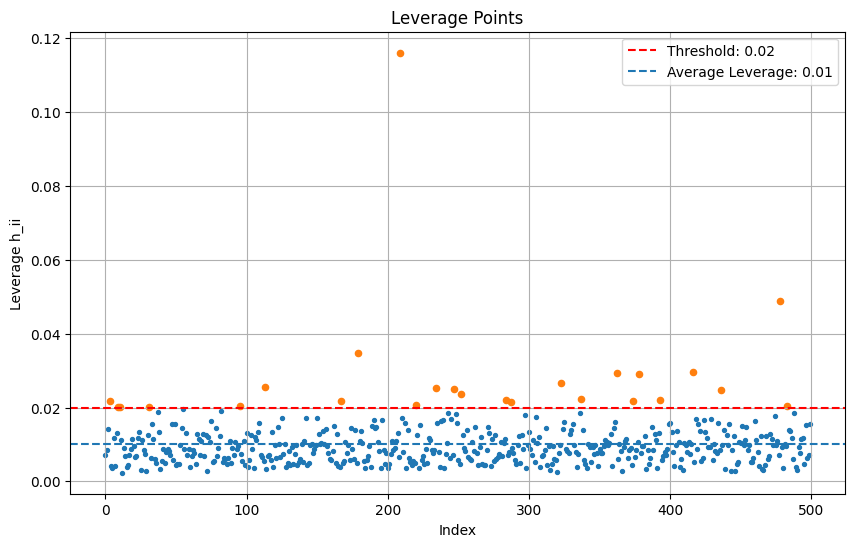

In [10]:
# Plotting leverage points
plt.figure(figsize=(10,6))
plt.scatter(summary["index"], summary["leverage"], s=8)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.axhline(y=avg_lev, linestyle='--', label=f'Average Leverage: {avg_lev:.2f}')
hi_idx = summary.index[summary["leverage"] > threshold].tolist()
if len(hi_idx) > 0:
  plt.scatter(hi_idx, summary.loc[hi_idx, "leverage"], s=20)
plt.xlabel('Index')
plt.ylabel('Leverage h_ii')
plt.title('Leverage Points')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#leverage points
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [12]:
# Generate synthetic data
np.random.seed(0)

# Normal house
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0,20000, 100)

# Add few masion
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

In [13]:
# Printing model parameter
print("Model with manssions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slpoe: {model.params[1]:.2f}")

Model with manssions:
Intercept: -225040.03
Slpoe: 114.59


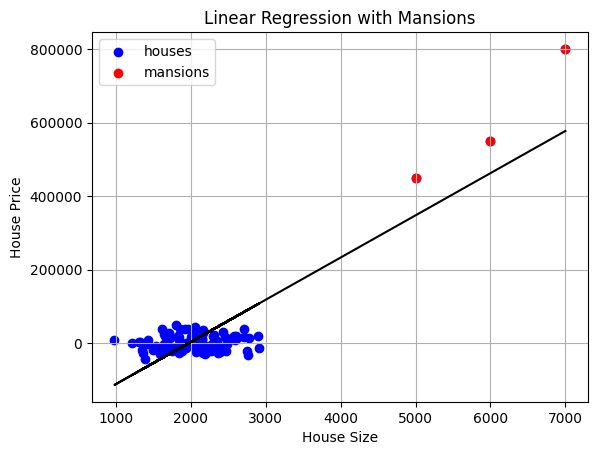

In [14]:
# Plot the data
plt.scatter(house_size, house_price, label='houses', color='blue')
plt.scatter(house_size[-3:], house_price[-3:], label='mansions', color='red')
plt.plot(house_size, model.params[0] + model.params[1]*house_size, color='black')
plt.title("Linear Regression with Mansions")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Get the leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Threshold
n = len(house_size)
p = X.shape[1]
avg_lev = p/n
threshold = 2* avg_lev
print(threshold)

0.038834951456310676


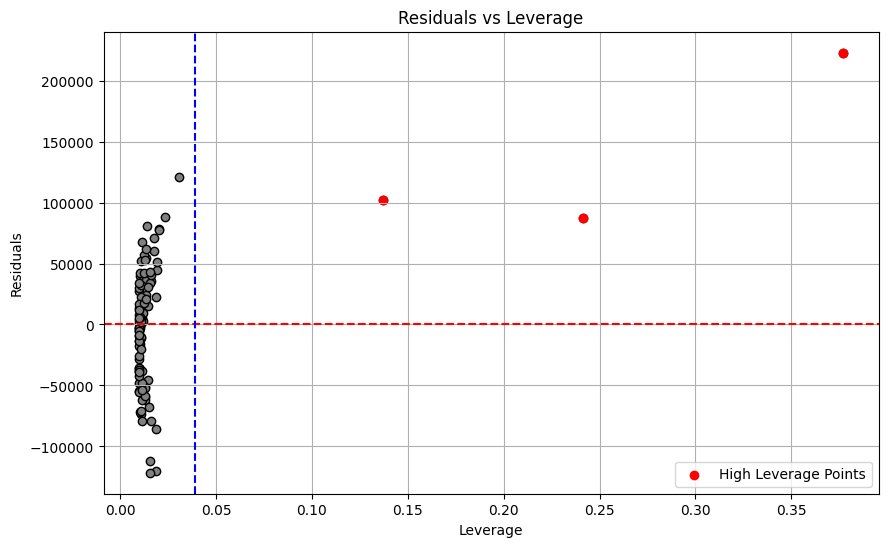

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs Leverage")
plt.grid(True)

high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], color='red', label='High Leverage Points')
plt.legend()
plt.show()

In [17]:
print(f"High Leverage Points (index): {high_leverage_points}")
print(f"Leverage values: {leverage[high_leverage_points]}")


High Leverage Points (index): [100 101 102]
Leverage values: [0.13694378 0.24146323 0.37708716]


Exercise 1:
Use the Boston Housind Dataset, analyze it, and identify the leverage points. This dataset is available in the seaborn library.

In [18]:
# ============================
# EJERCICIO 1 — California Housing (sklearn)
# ============================

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar dataset
california = fetch_california_housing()
df_cal = pd.DataFrame(california.data, columns=california.feature_names)
df_cal["target"] = california.target

df_cal.head()

# Variables predictoras
X = df_cal.drop(columns=["target"])
y = df_cal["target"]

# Agregar intercepto
X_const = sm.add_constant(X)

# Ajustar regresión
model_cal = sm.OLS(y, X_const).fit()

# Obtener influencia
influence = model_cal.get_influence()
leverage = influence.hat_matrix_diag
residuals = model_cal.resid

# Threshold clásico
n = len(df_cal)
p = X_const.shape[1]
avg_lev = p/n
threshold = 2 * avg_lev

print(f"Average leverage: {avg_lev:.4f}")
print(f"Threshold: {threshold:.4f}")

# Grá


Average leverage: 0.0004
Threshold: 0.0009


Exercise 2:
Use the Boston Housing Dataset, analyze it, and identify the leverage points. This dataset is available in the seaborn library.

Average leverage: 0.0150
Threshold: 0.0300


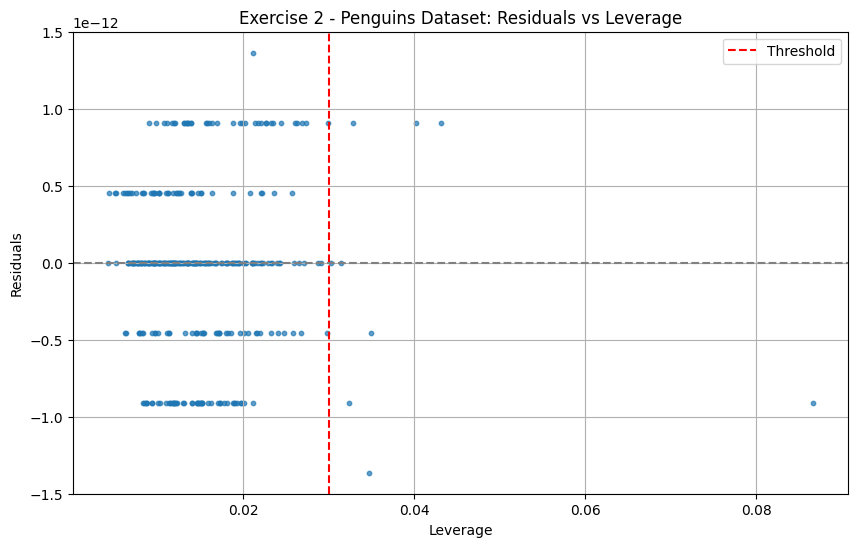

High leverage points (9 found): [  9  34 163 177 184 209 227 231 246]


,leverage,residuals,species
14,0.043133,9.094947e-13,Adelie
39,0.040208,9.094947e-13,Adelie
169,0.086613,-9.094947e-13,Chinstrap
183,0.030197,0.000000e+00,Chinstrap
190,0.034635,-1.364242e-12,Chinstrap
215,0.034955,-4.547474e-13,Chinstrap
233,0.031423,0.000000e+00,Gentoo
237,0.032858,9.094947e-13,Gentoo
253,0.032301,-9.094947e-13,Gentoo


In [20]:
# ============================
# EJERCICIO 2 — Penguins (seaborn)
# ============================

import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar dataset
penguins = sns.load_dataset("penguins").dropna()

# Variables numéricas
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

X = penguins[num_cols]
y = penguins["body_mass_g"]

# Ajustar modelo
X_const = sm.add_constant(X)
model_peng = sm.OLS(y, X_const).fit()

influence = model_peng.get_influence()
leverage = influence.hat_matrix_diag
residuals = model_peng.resid

n = len(penguins)
p = X_const.shape[1]
avg_lev = p/n
threshold = 2 * avg_lev

print(f"Average leverage: {avg_lev:.4f}")
print(f"Threshold: {threshold:.4f}")

# Gráfico leverage vs residuals
plt.figure(figsize=(10,6))
plt.scatter(leverage, residuals, s=10, alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Exercise 2 - Penguins Dataset: Residuals vs Leverage")
plt.legend()
plt.grid(True)
plt.show()

# Puntos influyentes
high_lev_penguins = np.where(leverage > threshold)[0]
print(f"High leverage points ({len(high_lev_penguins)} found):", high_lev_penguins[:15])

summary_peng = pd.DataFrame({
    "leverage": leverage,
    "residuals": residuals,
    "species": penguins["species"].values
})

summary_peng.iloc[high_lev_penguins].head(10)
